In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import os
import sys
import random
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("muted")
random.seed(20241017)
np.random.seed(20241017)
torch.manual_seed(3407) # Torch.manual_seed(3407) is all you need. Paper: http://arxiv.org/abs/2109.08203

# 修改工作路径，使本.ipynb文件能够像在本文件夹根目录下一样导入其他模块
# Modify the working path so that this.ipynb file can import other modules like in the root directory
current_dir = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(current_dir, '..'))

In [2]:
from models.RNN import RNN, LSTM, GRU
from models.CNN import CNN, TCN
from models.MLP import MLP
from models.transformer import Transformer, iTransformer, PatchTST, Reformer, Informer
from models.Linear import LLinear, DLinear, NLinear
from models.stat import Identical, ExponentialMovingAverage, SVR
from gas_data_prediction.utils import FitHistory

# Hyperparameters
num_epochs = 20
learning_rate = 0.001
input_len = 64
output_len = 16
label_len = 0 # label_len should be set only for decoder-based models, or there is potential risk of data leakage.
input_channels = 10
output_channels = 10
batch_size = 32
#device = 'cpu'  # 设备
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Instantiate models, loss functions, evaluation functions, and optimizers
# 实例化模型、损失函数、评估函数和优化器
MODEL = CNN(
    input_len=input_len, output_len=output_len, input_channels=input_channels, output_channels=output_channels,
    ).to(device)
loss_func = nn.MSELoss()
metric_func=nn.L1Loss()
optimizer = optim.Adam(MODEL.parameters(), lr=learning_rate)
history=FitHistory()
print('Model parameters: ', sum(p.numel() for p in MODEL.parameters()))

Model parameters:  90352


In [3]:
import gas_data_prediction.data_preprocessing as dp

data_paths=["E:\\科创优才\\实验数据\\毕设实验数据\\Testo20240509.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\testo20240511数据.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\烟气数据20240514.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\⁭烟气数据20240516.xlsx"]

var_names=['% O2', 'ppm CO', '% CO2', 'ppm NO', 'ppm NO2', '°C 烟温', 'ppm NOx', 'ppm SO2', '°C 环温', 'l/min 泵流量']

X, Y, X_grouped, Y_grouped = dp.get_XY(data_paths, input_len, output_len, label_len=label_len, var_names=var_names)
train_loader, val_loader, test_loader = dp.get_XY_loaders(X, Y, batch_size=batch_size)

len(X_grouped): 4
len(Y_grouped): 4
X shape:  (1776, 64, 10)
Y shape:  (1776, 16, 10)
Train dataset size: X: (1243, 64, 10); Y: (1243, 16, 10)
Val dataset size: X: (177, 64, 10); Y: (177, 16, 10)
Test dataset size: X: (355, 64, 10); Y: (355, 16, 10)


 10%|█         | 2/20 [00:03<00:27,  1.51s/it]

Epoch [ 1  /20], Time: 3.4706s, Loss: 0.6536, Metric: 0.4325, Val Loss: 0.7394, Val Metric: 0.2721
Epoch [ 2  /20], Time: 0.1438s, Loss: 0.4192, Metric: 0.2341, Val Loss: 0.6852, Val Metric: 0.2251


 20%|██        | 4/20 [00:03<00:09,  1.69it/s]

Epoch [ 3  /20], Time: 0.1403s, Loss: 0.3736, Metric: 0.2122, Val Loss: 0.6531, Val Metric: 0.2431
Epoch [ 4  /20], Time: 0.1415s, Loss: 0.3405, Metric: 0.2045, Val Loss: 0.6364, Val Metric: 0.2353


 30%|███       | 6/20 [00:04<00:04,  3.01it/s]

Epoch [ 5  /20], Time: 0.1434s, Loss: 0.3171, Metric: 0.1860, Val Loss: 0.6482, Val Metric: 0.2007
Epoch [ 6  /20], Time: 0.1384s, Loss: 0.2999, Metric: 0.1709, Val Loss: 1.0636, Val Metric: 0.2303


 40%|████      | 8/20 [00:04<00:02,  4.25it/s]

Epoch [ 7  /20], Time: 0.1536s, Loss: 0.2874, Metric: 0.1678, Val Loss: 0.6047, Val Metric: 0.2012
Epoch [ 8  /20], Time: 0.1515s, Loss: 0.2726, Metric: 0.1669, Val Loss: 0.5738, Val Metric: 0.1846


 50%|█████     | 10/20 [00:04<00:01,  5.26it/s]

Epoch [ 9  /20], Time: 0.1543s, Loss: 0.2610, Metric: 0.1578, Val Loss: 0.5737, Val Metric: 0.1794
Epoch [ 10 /20], Time: 0.1446s, Loss: 0.2458, Metric: 0.1494, Val Loss: 0.5729, Val Metric: 0.1782


 60%|██████    | 12/20 [00:05<00:01,  5.94it/s]

Epoch [ 11 /20], Time: 0.1542s, Loss: 0.2441, Metric: 0.1448, Val Loss: 0.5783, Val Metric: 0.1711
Epoch [ 12 /20], Time: 0.1430s, Loss: 0.2405, Metric: 0.1529, Val Loss: 0.6027, Val Metric: 0.1773


 70%|███████   | 14/20 [00:05<00:00,  6.35it/s]

Epoch [ 13 /20], Time: 0.1478s, Loss: 0.2261, Metric: 0.1422, Val Loss: 0.5611, Val Metric: 0.1724
Epoch [ 14 /20], Time: 0.1457s, Loss: 0.2333, Metric: 0.1412, Val Loss: 0.6055, Val Metric: 0.1739


 80%|████████  | 16/20 [00:05<00:00,  6.38it/s]

Epoch [ 15 /20], Time: 0.1531s, Loss: 0.2200, Metric: 0.1369, Val Loss: 0.5704, Val Metric: 0.1729
Epoch [ 16 /20], Time: 0.1566s, Loss: 0.2221, Metric: 0.1451, Val Loss: 0.5820, Val Metric: 0.1717


 90%|█████████ | 18/20 [00:05<00:00,  6.68it/s]

Epoch [ 17 /20], Time: 0.1408s, Loss: 0.2162, Metric: 0.1362, Val Loss: 0.5909, Val Metric: 0.1772
Epoch [ 18 /20], Time: 0.1419s, Loss: 0.2103, Metric: 0.1341, Val Loss: 0.5473, Val Metric: 0.1627


100%|██████████| 20/20 [00:06<00:00,  3.19it/s]

Epoch [ 19 /20], Time: 0.1493s, Loss: 0.2030, Metric: 0.1295, Val Loss: 0.6583, Val Metric: 0.1812
Epoch [ 20 /20], Time: 0.1433s, Loss: 0.2020, Metric: 0.1337, Val Loss: 0.5427, Val Metric: 0.1528
Total Time: 6.2577s


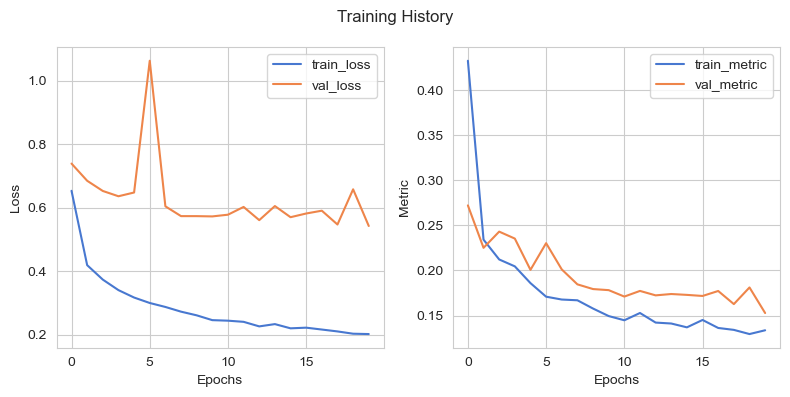

Number of epochs:  20
Training time:     6.2577s
Training loss:     0.2020
Training metric:   0.1337
Validation loss:   0.5427
Validation metric: 0.1528


100%|██████████| 12/12 [00:00<00:00, 637.77it/s]

Loss on test set:  0.13887579908043565


In [4]:
from gas_data_prediction.utils import train, plot_predictions
# train the model
history.update(
            *train(MODEL, train_loader, val_loader, optimizer,
                loss_func=nn.MSELoss(),
                metric_func=nn.L1Loss(),
                num_epochs=num_epochs,
                device=device,
                verbose=1)
            )
history.plot()
history.summary()
print("Loss on test set: ", MODEL.evaluate(test_loader,device=device))

e:\PythonProjects\gas-data-prediction\test_scripts\..\gas_data_prediction\utils.py:351: UserWarning: Glyph 8301 (\N{ACTIVATE ARABIC FORM SHAPING}) missing from font(s) STFangsong.
  plt.tight_layout(h_pad=2)
d:\Anaconda3\envs\env_py312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8301 (\N{ACTIVATE ARABIC FORM SHAPING}) missing from font(s) STFangsong.
  fig.canvas.print_figure(bytes_io, **kw)


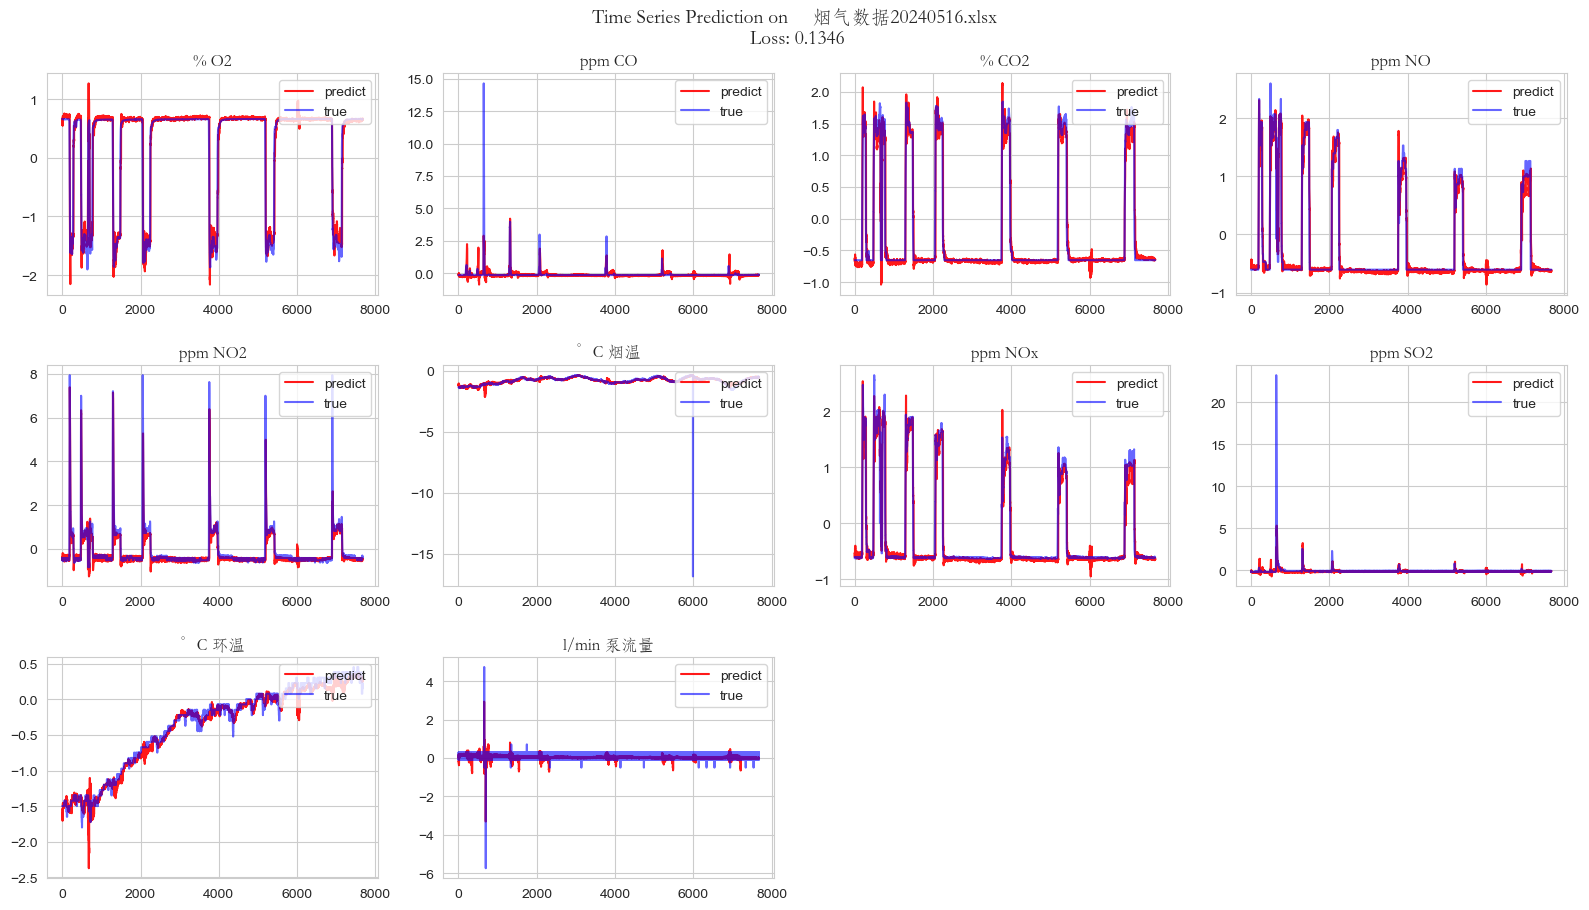

In [5]:
plot_predictions(MODEL, X_grouped, Y_grouped, var_names, data_paths,
                    iii=3,
                    figsize=(16,12),
                    device='cuda'
                    )